# Homework 5 Question 1: Enclosing circle
Given a set of points in the plane $x_i$ ∈ $R^2$
, we would like to find the circle
with smallest possible area that contains all of the points. Explain how to model this as an optimization
problem. To test your model, generate a set of 50 random points using the code $X = 4+randn(2,50)$
(this generates a 2×50 matrix X whose columns are the $x_i$). Produce a plot of the randomly generated
points along with the enclosing circle of smallest area.

## Problem Data

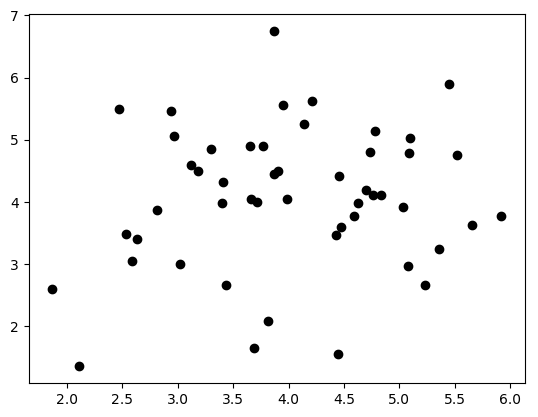

In [12]:
using PyPlot
X = 4 + randn(2,50) # generate 50 random points
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
;

## Problem Model 

In [14]:
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

# The number of dimensions each point has
dimensions = length(X[:,1])

# Number of points
points = length(X[1,:])

# Variable to define circle, Centre and Radius
@variable(m, centre[1:dimensions])
@variable(m, rSquare >= 0)

# Constraint to enclose all the points within the circle
@constraint(m, enclosing[i in 1:points], sum((X[j,i] - centre[j])^2 for j in 1:dimensions) <= rSquare)

@objective(m, Min, rSquare);

In [15]:
status = solve(m)
centre = getvalue(centre)
radius = sqrt(getobjectivevalue(m))
println("Status: ", status)
println("Min radius: ",radius)
println("Circle centered at: ",centre)

Status: Optimal
Min radius: 2.85871319235452
Circle centered at: [3.36254,3.93511]


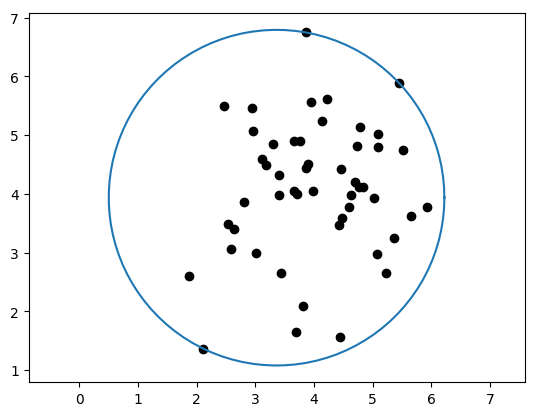

In [16]:
t = linspace(0,2pi,100) # parameter that traverses the circle
plot( centre[1] + radius*cos(t), centre[2] + radius*sin(t)) # plot circle radius r with center (x1,x2)
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal") # make x and y scales equal
;